In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [134]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

## 1. Find the linear regression equation for this data.

General form:     Y = aX + b
General idea is that temperature affects chirps/second

a is the slope, b is the y-intercept

Independent variable, X: temperature

Dependent variable, Y: chirps/second

In [98]:
# must reshape
x = df["Ground Temperature"].values.reshape(-1,1)
y = df['Chirps/Second'].values.reshape(-1,1)
# equation is printed down below, with the plot

## 2. Chart the original data and the equation on the chart.

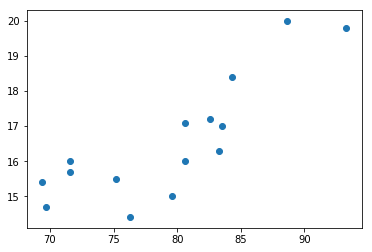

In [99]:
# here is just the data plotted as a scatter plot
plt.scatter(x, y);
plt.show()

Linear Regression Equation is:  [[ 0.20299973]] * x +  [ 0.45931465]


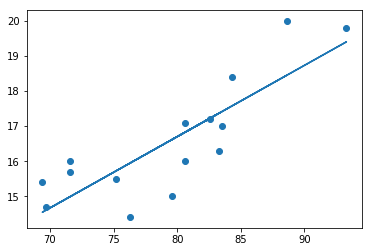

In [100]:
# now, here is the same scatter plot with the linear regression on top
model = LinearRegression()
model.fit(x, y)
xfit = x
yfit = (model.coef_)*x + model.intercept_

print "Linear Regression Equation is: ", model.coef_, "* x + ", model.intercept_
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [101]:
r2 = model.score(x, y)
print r2

0.692294652915


ANSWER:      

$R^2$ = 0.692294652915

This is not a significant $R^2$, based on the clue of 0.8.

## 4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [102]:
pred1 = model.predict(95)
print pred1

[[ 19.74428913]]


ANSWER: 19.74428913

## 5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [103]:
# no need to model; just rearrange y = mx + b, solve for x
# plug that value into .predict() to verify
# algebra:
#      y - b = mx  
#      x = (y-b) / m

flip = (18 - model.intercept_ ) / (model.coef_)
print flip
# ANSWER: 86.40743135
flip_pred = model.predict(flip)
print flip_pred

[[ 86.40743135]]
[[ 18.]]


ANSWER: 86.40743135

# Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.


## 1. Find the linear regression equation for this data for brain weight to body weight.

In [104]:
df = pd.read_fwf("brain_body.txt")
# equation is down below in answer to question 3

## 2. Chart the original data and the equation on the chart.

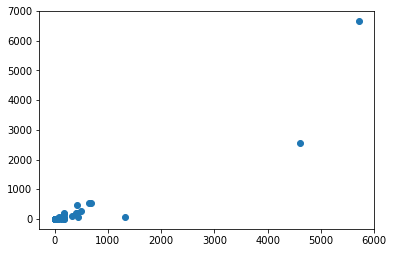

In [105]:
# plotting original data
x = df["Body"].values.reshape(-1, 1)
y = df["Brain"].values.reshape(-1, 1)

plt.scatter(x, y);
plt.show()

Linear Regression Equation is:  [[ 0.90291295]] * x +  [-56.85554543]


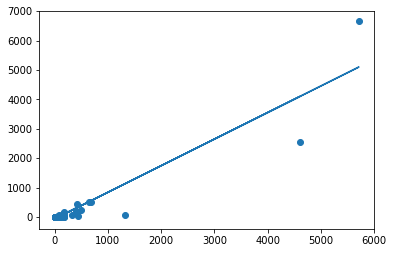

In [106]:
# plotting the linear regression model
model = LinearRegression()
model.fit(x, y)
xfit = x
yfit = (model.coef_)*x + model.intercept_

print "Linear Regression Equation is: ", model.coef_, "* x + ", model.intercept_
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [107]:
r2 = model.score(x, y)
print r2

0.872662084304


ANSWER: 0.872662084304

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [139]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [140]:
# calculate all r2s where independent variable is df[columns 1-5] and df[column 6] is dependent variable
r2s = {}

for column in df:
    if column != "Salary":
        x = df[column].values.reshape(-1, 1)
        y = df["Salary"].values.reshape(-1, 1)
        
        model = LinearRegression()
        model.fit(x, y)
        
        xfit = x
        yfit = (model.coef_)*x + model.intercept_
        
        r2 = model.score(x, y)
        
        plt.scatter(x, y)
        plt.plot(xfit, yfit)
        
        # add the r2 to the r2s dictionary
        r2s[column] = r2
        print "Equation for ", column, ":     ", model.coef_, "* x + ", model.intercept_


print "Comparison of R2's: "
for key, value in sorted(r2s.iteritems(), key=lambda (k,v): (v,k)):
    print "%-*s : %s" % (6, key, value)
    
    


Equation for  Sex :      [[-3339.64661654]] * x +  [ 24696.78947368]
Equation for  Rank :      [[ 5952.77890467]] * x +  [ 11663.14300203]
Equation for  Year :      [[ 752.79775742]] * x +  [ 18166.14754547]
Equation for  Degree :      [[-858.86928105]] * x +  [ 24359.22222222]
Equation for  YSdeg :      [[ 390.64512637]] * x +  [ 17502.25738659]
Comparison of R2's: 
Degree : 0.00486168098475
Sex    : 0.0638989258329
YSdeg  : 0.455428134584
Year   : 0.490937026769
Rank   : 0.752536053927


The $R^2$ of Sex with respect to Salary is ~0.0639. If $R^2$ is the only relevant statistic that measures correlation in this dataset, and a correlation of 0.8 is considered strong, then sex is not a strong factor in determining salary. A stronger factor would be rank or year.  

# Additional Questions

## (1) What is the geometric interpretation of why ridge and lasso are different? Why does this matter? What happens to the parameters in each case.

## WHY USE BASIS FUNCTIONS?
This discussion revolves around the importance of regularization when you decide to use basis functions. Basis functions can introduce a certain flexibility into your linear regression that allows you to model variables that are non-linearly related. However, this flexibility confers a high risk of over-fitting, which makes the model seemingly "jump" to extreme "spikes" during prediction. If not mitigated, this flexibility can act like a bucking bronco, knocking validation statistics off-mark.

## WHY USE REGULARIZATION?
Employing regularization allows the regression model to reap the benefits of flexibility while minimizing the dangers of over-fitting. The geometric interpretation of regularization is that it pacifies the bucking bronco, so to speak. It's as if the violence to which the bronco can buck has been capped in some way. The bucks are then less violent in any direction, meaning the predictions don't "spike" as much, and then the resultant graph is much more smooth; in a word, it is regularized. 

## L1/L2 REGULARIZATION SIMILARITIES:
There are two types of regularization: ridge (L2) and lasso (L1). They can both be imagined as "penalties" applied to extreme values; imagine that when the bronco bucks violently, the legs are slapped back down so that the power of the kick is dampened, and rider is not thrown off. This corresponds to geometric space in the sense that the prediction graph would be bucking all over the place due to the flexibility introduced by basis functions; but, thanks to L1/L2 regularization, the distance to which the predictions can be "bucked" off course is capped, and the graph has a smoother ride, appearing more "regularized."

With respect to paramaters, both L1/L2 are affecting the parameters in different ways that result in the sort of "dampening" of extreme values explained above. Specifically, they "dampen" the model's coefficients a (slope) and b (y-intercept) in different ways that result in the "smoother ride" in the model's prediction curve.

## L1/L2 REGULARIZATION DIFFERENCES:
L2: L2 penalizes the sum of squares of model coefficients.
L1: L1 penalizes the sum of absolute values (1-norms) of model coefficients. Geometrically, this differs from L2 because in L1, the penalization results in many coefficients of zero.



## (2) Implement Linear Regression (ols; any way you like). Fit random data, and plot your model’s best fit line and dataset.

In [137]:
# Standalone simple linear regression example
from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)
 
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions
 
# Test simple linear regression
dataset = [[1, 5], [2, 8], [4, 1], [1, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[4.515151515151515, 4.318181818181818, 3.9242424242424243, 4.515151515151515, 3.7272727272727275]
RMSE: 2.461


## (3) Would you ever use gradient descent to solve this problem?

Gradient descent is computationally efficient, so if computation time was an issue and the model really needed to be optimized, then gradient descent could help optimize the model. 